In [1]:
import pandas as pd
from pycaret.regression import *
import face_recognition
import numpy as np

In [2]:
def get_face_encoding(image_path):
    picture_of_me = face_recognition.load_image_file(image_path)
    my_face_encoding = face_recognition.face_encodings(picture_of_me)
    if not my_face_encoding:
        print(f"No face found in {image_path}")
        return 0
    return my_face_encoding[0].tolist()

In [3]:
df = pd.read_csv("talents_dataset/combine.csv")
print(df.shape)

all_faces = []
remove_idx = []
for i, id in enumerate(df.id):
    face_enc = get_face_encoding(f"talents_dataset/{id:04}.jpg")
    if face_enc == 0:
        remove_idx.append(i)
        continue
    all_faces.append(face_enc)
X = np.array(all_faces)
df_face = pd.DataFrame(X)
print(df_face.shape)

df = df.drop(remove_idx)
print(df.shape)

(1956, 7)
No face found in talents_dataset/0019.jpg
No face found in talents_dataset/0073.jpg
No face found in talents_dataset/0116.jpg
No face found in talents_dataset/0138.jpg
No face found in talents_dataset/0221.jpg
No face found in talents_dataset/0235.jpg
No face found in talents_dataset/0252.jpg
No face found in talents_dataset/0258.jpg
No face found in talents_dataset/0306.jpg
No face found in talents_dataset/0385.jpg
No face found in talents_dataset/0435.jpg
No face found in talents_dataset/0485.jpg
No face found in talents_dataset/0525.jpg
No face found in talents_dataset/0543.jpg
No face found in talents_dataset/0575.jpg
No face found in talents_dataset/0584.jpg
No face found in talents_dataset/0610.jpg
No face found in talents_dataset/0849.jpg
No face found in talents_dataset/0911.jpg
No face found in talents_dataset/0957.jpg
No face found in talents_dataset/0975.jpg
No face found in talents_dataset/1016.jpg
No face found in talents_dataset/1018.jpg
No face found in talents

In [6]:
df_bmi = pd.concat([df.drop(["id", "height", "weight"], axis=1), df_face], axis="columns", join="inner")
df_bmi

,bmi,old,female,male,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,20.983988,38,0,1,-0.045086,0.132831,0.006687,0.053503,-0.062763,0.054994,-0.058659,-0.168471,0.182566,-0.121785,0.239263,-0.075669,-0.183535,-0.036603,-0.066422,0.132880,-0.184295,-0.151113,-0.007918,-0.051586,0.123578,0.074032,-0.025515,0.000217,-0.083860,-0.314293,-0.109782,-0.125902,0.093250,-0.034067,-0.080549,0.046620,-0.180507,0.007270,0.024011,0.113825,-0.015000,-0.026508,0.119434,-0.020124,-0.206126,0.065577,0.026808,0.235767,0.171272,-0.003973,0.003517,-0.178266,0.093215,-0.106752,0.060580,0.174203,0.108359,0.106492,0.019473,-0.165494,-0.044870,0.096625,-0.115108,0.081259,0.179913,-0.086215,-0.012661,-0.107902,0.148201,0.097814,-0.066796,-0.257301,0.126160,-0.202686,-0.102934,0.135805,-0.128897,-0.189273,-0.263163,0.031789,0.438211,0.112555,-0.134143,0.048041,0.016598,-0.000777,0.168278,0.136237,-0.004522,0.036257,-0.129300,0.033190,0.250610,-0.045025,-0.040527,0.181863,-0.090861,0.069468,0.028495,0.062114,-0.031895,0.043519,-0.125982,-0.018945,-0.067357,-0.090376,-0.057003,0.061073,-0.083138,0.126116,-0.031599,0.061503,-0.041132,-0.051097,-0.073466,0.070079,0.209421,-0.257006,0.221697,0.088801,0.081890,0.143408,0.070944,0.146528,-0.052201,-0.107898,-0.299119,-0.033602,0.024206,-0.027993,0.031367,0.006156
1,16.384697,25,1,0,-0.027711,0.054663,0.055813,-0.115026,-0.181949,-0.050100,-0.121180,-0.063220,0.167914,-0.173015,0.214020,-0.076516,-0.177486,0.011434,-0.079194,0.230160,-0.194423,-0.196514,-0.011266,0.034888,0.055822,0.009218,-0.016640,0.049711,-0.071764,-0.351391,-0.143086,-0.089780,0.040905,-0.078729,-0.069151,0.004613,-0.125386,0.007920,0.077418,0.079202,-0.037083,-0.151517,0.135979,-0.007815,-0.323797,0.041636,0.085326,0.207803,0.172265,0.032350,0.038800,-0.196673,0.159100,-0.116337,0.048762,0.140861,0.114648,0.045500,0.055055,-0.153627,0.010098,0.179431,-0.176935,0.034447,0.093379,0.016504,0.015228,-0.177329,0.264257,0.136082,-0.161701,-0.241431,0.183341,-0.171081,-0.088186,0.064915,-0.185885,-0.182178,-0.199403,-0.056000,0.323279,0.068628,-0.134657,0.065129,0.018827,-0.030591,0.017564,0.207516,-0.026893,0.047841,-0.047878,-0.033456,0.284072,-0.122832,0.043970,0.169609,-0.087674,0.050072,-0.010435,0.001596,-0.129883,0.064836,-0.134674,-0.025596,-0.059707,-0.074939,-0.055478,0.082115,-0.107291,0.069956,-0.028959,0.025586,-0.044465,0.026230,-0.092628,-0.085518,0.172464,-0.187441,0.272119,0.141243,0.141278,0.077677,0.131041,0.095844,0.014880,-0.060290,-0.216734,0.013437,0.070665,-0.094674,0.059520,-0.008046
2,22.694019,24,0,1,-0.153664,0.163189,0.055899,-0.004503,-0.120166,-0.027565,-0.064109,-0.055401,0.200562,-0.162181,0.241884,-0.042141,-0.226621,-0.049719,-0.028932,0.159186,-0.124739,-0.130050,-0.016169,0.011389,0.186696,0.064814,-0.030512,0.062266,-0.087057,-0.331128,-0.058423,-0.035694,0.027882,-0.094443,-0.057620,-0.078790,-0.183919,-0.074807,0.003066,0.084595,-0.074583,-0.002422,0.165757,0.028017,-0.308170,0.029574,0.064917,0.282277,0.146731,0.110447,-0.034133,-0.195088,0.123925,-0.196999,0.037633,0.195770,0.062072,0.044604,0.037945,-0.153213,0.051821,0.151806,-0.201077,0.062113,0.131576,-0.123353,-0.016502,-0.016012,0.190038,-0.006192,-0.102668,-0.171981,0.113913,-0.174020,-0.088919,0.162547,-0.055536,-0.251573,-0.307292,0.033033,0.474426,0.133189,-0.150202,0.074935,-0.038938,-0.036982,0.156500,0.171505,-0.008181,-0.014859,-0.174019,-0.014001,0.196929,-0.027615,0.051293,0.241715,0.076391,0.036812,0.021128,0.102445,-0.178782,0.001878,-0.148059,-0.129867,0.021898,-0.072351,-0.033297,0.078993,-0.242291,0.182777,0.024375,-0.024305,-0.005933,-0.019241,-0.046421,-0.038771,0.083677,-0.230480,

In [7]:
exp_bmi = setup(df_bmi, target="bmi")

,Description,Value
0,session_id,2505
1,Target,bmi
2,Original Data,"(1865, 132)"
3,Missing Values,False
4,Numeric Features,129
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1305, 130)"


In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,6.5335,456.6228,20.5356,-0.0086,0.5464,2.5887,0.0120
dummy,Dummy Regressor,6.5335,456.6228,20.5356,-0.0086,0.5464,2.5887,0.0090
lasso,Lasso Regression,6.7872,456.6603,20.5546,-0.0126,0.5524,2.6219,0.0070
en,Elastic Net,6.8058,456.6476,20.5555,-0.0129,0.5528,2.6239,0.0060
br,Bayesian Ridge,6.7650,457.1396,20.5624,-0.0131,0.5522,2.6223,0.0100
huber,Huber Regressor,5.2209,470.3594,20.8041,-0.0307,0.5284,2.1823,0.0760
omp,Orthogonal Matching Pursuit,7.9237,469.4373,20.8657,-0.0474,0.5801,2.8302,0.0060
ridge,Ridge Regression,7.6486,470.8562,20.8926,-0.0489,0.5742,2.7644,0.0070
par,Passive Aggressive Regressor,7.3614,478.4700,21.0081,-0.0544,0.5699,2.3338,0.0070
et,Extra Trees Regressor,7.6388,491.7714,21.4951,-0.1304,0.5771,2.5346,0.5460


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=2505, verbose=False)

In [14]:
model_bmi = create_model("huber")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.5666,793.0973,28.1620,-0.0412,0.6878,3.6451
1,5.0560,401.7977,20.0449,-0.0252,0.5248,2.1971
2,6.7517,799.6831,28.2787,-0.0395,0.5550,1.6481
3,4.1528,228.8040,15.1263,-0.0262,0.5644,3.4616
4,3.6069,211.8691,14.5557,0.0034,0.4506,1.7869
5,3.3791,209.1081,14.4606,-0.0319,0.4876,2.2304
6,4.4533,338.8350,18.4075,-0.0350,0.4623,1.7327
7,6.6074,761.2878,27.5914,-0.0355,0.6481,2.9414
8,3.7163,184.4569,13.5815,-0.0179,0.4902,2.0624


In [15]:
print(model_bmi)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


In [16]:
tuned_model_bmi = tune_model(model_bmi)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.6583,794.7400,28.1911,-0.0433,0.6918,3.7259
1,5.0634,401.0699,20.0267,-0.0234,0.5254,2.2296
2,6.7703,798.8634,28.2642,-0.0384,0.5545,1.6549
3,4.1492,228.9518,15.1312,-0.0269,0.5649,3.4774
4,3.6032,211.1781,14.5320,0.0067,0.4510,1.8126
5,3.4241,209.0347,14.4580,-0.0315,0.4892,2.2629
6,4.4722,336.6449,18.3479,-0.0283,0.4621,1.7639
7,6.6260,758.1800,27.5351,-0.0313,0.6477,2.9719
8,3.7738,184.6454,13.5884,-0.0189,0.4912,2.0776


In [17]:
predict_model(tuned_model_bmi)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,5.6583,572.7282,23.9317,-0.0208,0.5310,1.9089


,old,0,1,2,3,4,5,6,7,8,...,121,122,123,124,125,126,127,male_1,bmi,Label
0,38.0,-0.051449,0.046483,0.034989,-0.046027,-0.178154,-0.025255,-0.109400,-0.045100,0.196980,...,-0.015881,-0.224047,-0.036661,0.074034,-0.124906,0.126390,0.027657,1.0,27.469135,21.543066
1,27.0,-0.045329,0.002274,0.051563,-0.074516,-0.104923,-0.046061,-0.035628,-0.127447,0.059238,...,0.009230,-0.240499,0.002799,0.173947,-0.004093,0.098085,-0.005747,1.0,22.229061,20.145631
2,33.0,-0.087123,0.107216,0.056073,0.012210,-0.081465,-0.113994,-0.096808,-0.162069,0.058345,...,-0.060698,-0.144862,-0.004121,0.111975,-0.046526,0.064259,0.037420,0.0,16.937033,19.668849
3,27.0,-0.018992,0.039649,0.053086,0.007315,-0.101178,-0.042934,-0.065274,-0.110182,0.082158,...,-0.023941,-0.192223,-0.062063,0.082173,-0.027429,0.070443,0.030215,0.0,18.080210,18.714786
4,26.0,-0.062029,0.018098,-0.022046,-0.059005,-0.158967,-0.026885,-0.086469,-0.130321,0.113605,...,-0.113137,-0.235465,-0.005146,0.099664,-0.068937,0.082142,0.010793,1.0,17.208067,20.838211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,31.0,-0.047485,0.066165,0.066645,-0.079537,-0.131598,-0.052827,-0.062719,-0.113975,0.133030,...,-0.031094,-0.263760,-0.010148,0.106177,-0.058779,0.047969,-0.000282,0.0,17.006804,19.391349
556,30.0,-0.070472,-0.031260,0.081662,-0.141010,-0.153442,-0.107049,-0.036662,-0.140271,0.107800,...,-0.082280,-0.169756,0.004984,0.081316,0.040346,0.118329,0.020087,0.0,20.832529,19.505474
557,31.0,-0.063286,0.063137,0.063899,-0.022249,-0.069789,0.032102,-0.148836,-0.169664,0.158513,...,0.056156,-0.170698,-0.056851,0.046686,-0.023757,0.030733,0.071646,1.0,18.144869,21.299054
558,21.0,-0.120017,0.098104,0.061507,-0.031930,-0.095983,0.005830,0.006065,-0.051352,0.042848,...,-0.043805,-0.212858,-0.087246,0.105024,0.015772,0.091536,0.056428,0.0,17.928215,17.771496


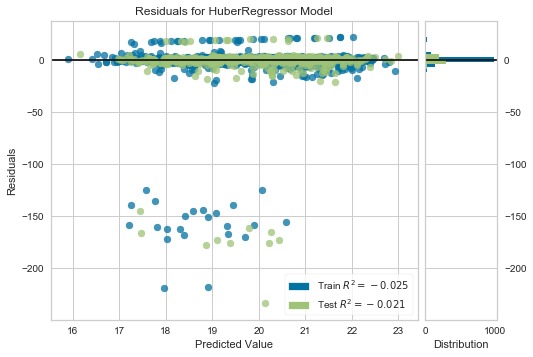

In [20]:
plot_model(tuned_model_bmi)

In [21]:
save_model(tuned_model_bmi, "models/model_bmi")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='bmi',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='bmi')),
                 ('fix_perfect', Remove_100(target='bmi')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                

In [22]:
df_height = pd.concat([df.drop(["id", "bmi", "weight"], axis=1), df_face], axis="columns", join="inner")
df_height

,height,old,female,male,0,1,2,3,4,5,...,118,119,120,121,122,123,124,125,126,127
0,176,38,0,1,-0.045086,0.132831,0.006687,0.053503,-0.062763,0.054994,...,0.070944,0.146528,-0.052201,-0.107898,-0.299119,-0.033602,0.024206,-0.027993,0.031367,0.006156
1,162,25,1,0,-0.027711,0.054663,0.055813,-0.115026,-0.181949,-0.050100,...,0.131041,0.095844,0.014880,-0.060290,-0.216734,0.013437,0.070665,-0.094674,0.059520,-0.008046
2,183,24,0,1,-0.153664,0.163189,0.055899,-0.004503,-0.120166,-0.027565,...,0.142455,0.072011,-0.011147,-0.083407,-0.214366,-0.064762,0.020911,-0.035171,0.116122,-0.003254
3,157,26,1,0,-0.080068,0.099175,0.081138,-0.120926,-0.129681,-0.002601,...,0.159963,0.062903,0.054478,0.017177,-0.142347,-0.021151,0.118953,-0.023965,0.068666,-0.030829
4,174,22,0,1,-0.113007,0.072110,0.008861,-0.052794,-0.148315,0.056080,...,0.160634,0.109057,0.029727,-0.045771,-0.192783,-0.058099,0.042032,-0.013518,0.122948,0.094141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,183,31,0,1,-0.060873,0.065719,0.013905,-0.090321,-0.155234,-0.016961,...,0.147640,0.087038,-0.028167,-0.015396,-0.213221,-0.014705,0.129194,-0.054223,0.057605,-0.015553
1906,178,32,0,1,-0.126947,0.083635,0.022642,-0.081267,-0.177568,-0.017877,...,0.159029,0.030210,-0.020342,0.011186,-0.223467,-0.027877,0.106044,-0.070939,0.120539,0.038180
1907,177,40,0,1,-0.105616,0.133740,0.058396,-0.028749,-0.144537,0.025672,...,0.155818,0.039095,0.022531,-0.085505,-0.234441,0.026117,0.136056,-0.071000,0.070757,-0.006905
1908,161,40,1,0,-0.144772,0.090539,0.110730,0.081682,-0.035281,-0.077074,...,0.103346,0.100775,-0.026372,-0.090368,-0.190272,-0.014460,0.046527,0.008240,0.087038,0.016651


In [23]:
exp_height = setup(df_height, target="height")

,Description,Value
0,session_id,8026
1,Target,height
2,Original Data,"(1865, 132)"
3,Missing Values,False
4,Numeric Features,129
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1305, 129)"


In [24]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,75.8568,57049.1742,231.4594,-0.0115,0.3951,0.2543,0.2500
br,Bayesian Ridge,75.8568,57049.2538,231.4596,-0.0115,0.3951,0.2543,0.0080
dummy,Dummy Regressor,75.8568,57049.1741,231.4594,-0.0115,0.3951,0.2543,0.0060
lasso,Lasso Regression,75.8810,57110.2974,231.6113,-0.0131,0.3958,0.2545,0.0060
en,Elastic Net,75.8806,57111.7807,231.6149,-0.0132,0.3959,0.2545,0.0060
huber,Huber Regressor,46.9194,58509.8317,233.9257,-0.0276,0.3637,0.0717,0.0780
ridge,Ridge Regression,81.6808,59428.1630,236.6174,-0.0641,0.4367,0.2865,0.0060
omp,Orthogonal Matching Pursuit,83.8494,59999.0358,237.8881,-0.0768,0.4472,0.2989,0.0060
et,Extra Trees Regressor,89.7398,61123.2680,240.4499,-0.1051,0.4653,0.3364,0.4910
lightgbm,Light Gradient Boosting Machine,109.8081,65345.9804,249.5488,-0.2117,0.5712,0.4567,0.2650


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=8026, verbose=False)

In [29]:
model_height = create_model("huber")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,55.8465,74856.3351,273.5989,-0.0288,0.4116,0.0780
1,52.0090,64854.3403,254.6652,-0.0325,0.4004,0.0736
2,20.1215,17675.1126,132.9478,-0.0057,0.2105,0.0589
3,29.1636,29227.7660,170.9613,-0.0042,0.2762,0.0626
4,55.0817,72847.2434,269.9023,-0.0343,0.4108,0.0756
5,41.5233,51221.0495,226.3207,-0.0295,0.3546,0.0638
6,30.9056,34290.6460,185.1773,-0.0278,0.2959,0.0623
7,65.4714,85071.5725,291.6703,-0.0377,0.4502,0.0854
8,31.4033,35361.6837,188.0470,-0.0182,0.2928,0.0626


In [30]:
print(model_height)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


In [31]:
tuned_model_height = tune_model(model_height)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,55.5301,74749.4829,273.4035,-0.0273,0.4102,0.0763
1,52.0675,64864.1267,254.6844,-0.0326,0.4005,0.0740
2,19.3546,17608.4636,132.6969,-0.0019,0.2079,0.0543
3,28.7063,29371.7838,171.3820,-0.0092,0.2781,0.0595
4,55.0556,72759.9196,269.7405,-0.0331,0.4098,0.0756
5,41.2623,51096.7670,226.0459,-0.0270,0.3527,0.0624
6,30.6373,34080.3031,184.6085,-0.0215,0.2922,0.0611
7,65.1222,85166.8519,291.8336,-0.0389,0.4507,0.0831
8,31.2120,35317.7444,187.9302,-0.0169,0.2917,0.0616


In [33]:
predict_model(tuned_model_height)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,34.6030,40795.0887,201.9779,-0.0182,0.3128,0.0630


,old,0,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,height,Label
0,40.0,-0.111649,0.052728,0.064463,-0.093846,-0.076735,0.022472,-0.074799,-0.092567,0.097906,...,-0.000628,0.053072,-0.248227,-0.007154,0.126571,-0.064170,0.092951,-0.045999,160,171.477355
1,26.0,-0.089382,0.078029,0.062018,-0.050982,-0.150810,0.029531,-0.084301,-0.098551,0.125564,...,0.013003,-0.000004,-0.228720,-0.050799,0.111691,-0.027831,0.014837,0.008831,168,163.802638
2,27.0,-0.104669,0.077514,0.097374,-0.050155,-0.020515,-0.062136,-0.041880,-0.103032,0.089197,...,0.028215,-0.071257,-0.149563,0.005552,0.150202,-0.028288,0.058821,-0.063151,164,166.032025
3,31.0,-0.108879,0.077058,0.000030,-0.037902,-0.031177,-0.074369,-0.108183,-0.172233,0.110671,...,-0.043829,0.023850,-0.232624,-0.013461,0.042040,-0.017010,0.167053,0.032676,172,168.148929
4,32.0,-0.055938,0.053742,0.059249,-0.148173,-0.191470,0.024324,-0.112637,-0.084351,0.163481,...,0.007086,0.005224,-0.238604,-0.018107,0.099664,-0.060348,0.047295,-0.026972,160,167.277850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,19.0,-0.185787,0.090338,-0.033373,-0.032508,-0.071582,0.014025,-0.043337,-0.080162,0.134137,...,0.001223,0.017528,-0.228579,-0.067573,0.129595,-0.021677,0.124317,-0.022612,162,164.179143
556,15.0,-0.050146,0.069131,0.024135,-0.095127,-0.117228,-0.027133,-0.013152,-0.018792,0.184181,...,-0.031178,-0.027681,-0.239707,0.011119,0.130307,-0.025372,0.073093,-0.041725,155,159.974983
557,36.0,-0.104671,0.159702,0.172577,-0.057607,-0.084421,0.017900,-0.109961,-0.068002,0.136677,...,0.057271,-0.023166,-0.131402,-0.073990,0.044278,0.011073,0.101971,-0.025226,175,170.905815
558,20.0,-0.031165,0.036873,0.018753,-0.088275,-0.178221,0.031970,-0.086415,-0.027037,0.178518,...,0.022418,-0.025551,-0.248828,-0.034202,0.033599,-0.072112,0.026411,0.038721,152,162.433629


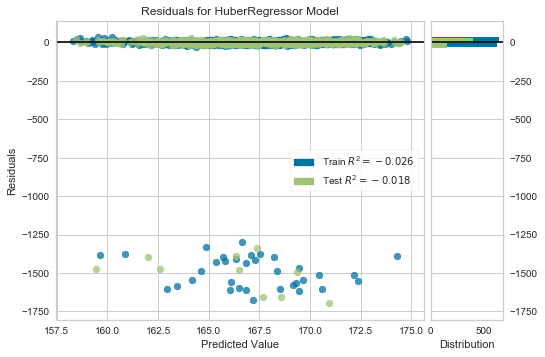

In [34]:
plot_model(tuned_model_height)

In [35]:
save_model(tuned_model_height, "models/model_height")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='height',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('dummy', Dummify(target='height')),
                 ('fix_perfect', Remove_100(target='height')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrou

In [36]:
df_weight = pd.concat([df.drop(["id", "bmi", "height"], axis=1), df_face], axis="columns", join="inner")
df_weight

,weight,old,female,male,0,1,2,3,4,5,...,118,119,120,121,122,123,124,125,126,127
0,65,38,0,1,-0.045086,0.132831,0.006687,0.053503,-0.062763,0.054994,...,0.070944,0.146528,-0.052201,-0.107898,-0.299119,-0.033602,0.024206,-0.027993,0.031367,0.006156
1,43,25,1,0,-0.027711,0.054663,0.055813,-0.115026,-0.181949,-0.050100,...,0.131041,0.095844,0.014880,-0.060290,-0.216734,0.013437,0.070665,-0.094674,0.059520,-0.008046
2,76,24,0,1,-0.153664,0.163189,0.055899,-0.004503,-0.120166,-0.027565,...,0.142455,0.072011,-0.011147,-0.083407,-0.214366,-0.064762,0.020911,-0.035171,0.116122,-0.003254
3,48,26,1,0,-0.080068,0.099175,0.081138,-0.120926,-0.129681,-0.002601,...,0.159963,0.062903,0.054478,0.017177,-0.142347,-0.021151,0.118953,-0.023965,0.068666,-0.030829
4,58,22,0,1,-0.113007,0.072110,0.008861,-0.052794,-0.148315,0.056080,...,0.160634,0.109057,0.029727,-0.045771,-0.192783,-0.058099,0.042032,-0.013518,0.122948,0.094141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,61,31,0,1,-0.060873,0.065719,0.013905,-0.090321,-0.155234,-0.016961,...,0.147640,0.087038,-0.028167,-0.015396,-0.213221,-0.014705,0.129194,-0.054223,0.057605,-0.015553
1906,61,32,0,1,-0.126947,0.083635,0.022642,-0.081267,-0.177568,-0.017877,...,0.159029,0.030210,-0.020342,0.011186,-0.223467,-0.027877,0.106044,-0.070939,0.120539,0.038180
1907,68,40,0,1,-0.105616,0.133740,0.058396,-0.028749,-0.144537,0.025672,...,0.155818,0.039095,0.022531,-0.085505,-0.234441,0.026117,0.136056,-0.071000,0.070757,-0.006905
1908,47,40,1,0,-0.144772,0.090539,0.110730,0.081682,-0.035281,-0.077074,...,0.103346,0.100775,-0.026372,-0.090368,-0.190272,-0.014460,0.046527,0.008240,0.087038,0.016651


In [37]:
exp_weight = setup(df_weight, target="weight")

,Description,Value
0,session_id,8311
1,Target,weight
2,Original Data,"(1865, 132)"
3,Missing Values,False
4,Numeric Features,129
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1305, 130)"


In [38]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,15.5049,3976.3514,56.9877,0.0053,0.3446,0.1331,0.0930
par,Passive Aggressive Regressor,20.9429,3891.7792,57.0071,-0.0430,0.3863,0.2539,0.0080
dummy,Dummy Regressor,21.3482,3870.6828,56.8199,-0.0444,0.3858,0.2749,0.0060
llar,Lasso Least Angle Regression,21.3482,3870.6828,56.8199,-0.0444,0.3858,0.2749,0.3200
lasso,Lasso Regression,21.1671,3871.5950,56.8384,-0.0518,0.3838,0.2703,0.0060
br,Bayesian Ridge,21.3984,3874.1187,56.8805,-0.0521,0.3870,0.2760,0.0090
en,Elastic Net,21.3600,3873.1556,56.8814,-0.0568,0.3866,0.2750,0.0060
ridge,Ridge Regression,22.5718,3973.5046,57.8506,-0.1112,0.4038,0.2897,0.0060
omp,Orthogonal Matching Pursuit,23.2891,4049.2758,58.4243,-0.1319,0.4189,0.3016,0.0070
et,Extra Trees Regressor,24.3914,4180.5641,60.3369,-0.3519,0.4323,0.3235,0.4880


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [39]:
model_weight = create_model("huber")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.2605,8387.7914,91.5849,-0.0743,0.4873,0.1480
1,13.0883,2900.8642,53.8597,0.0118,0.2981,0.1219
2,9.0339,776.8135,27.8714,0.0221,0.2378,0.1198
3,13.4735,2991.2669,54.6925,-0.0519,0.3552,0.1251
4,27.6469,9684.9559,98.4122,-0.0542,0.5064,0.1555
5,18.5388,5205.4918,72.1491,-0.0477,0.4105,0.1378
6,7.8258,154.3238,12.4227,0.3322,0.1908,0.1298
7,14.7988,2501.2993,50.0130,-0.0578,0.3401,0.1482
8,8.6196,875.8369,29.5945,-0.0104,0.2347,0.1145


In [40]:
print(model_weight)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


In [41]:
tuned_model_weight = tune_model(model_weight)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.1723,8378.1231,91.5321,-0.0730,0.4860,0.1468
1,13.1247,2899.1652,53.8439,0.0124,0.2977,0.1230
2,9.1160,776.2832,27.8619,0.0228,0.2377,0.1217
3,13.4148,2992.6914,54.7055,-0.0524,0.3552,0.1244
4,27.6320,9686.7953,98.4215,-0.0544,0.5064,0.1557
5,18.5327,5204.3684,72.1413,-0.0475,0.4107,0.1385
6,7.7550,148.7632,12.1969,0.3562,0.1869,0.1288
7,14.7099,2502.0176,50.0202,-0.0581,0.3397,0.1472
8,8.5896,877.5872,29.6241,-0.0124,0.2349,0.1144


In [42]:
predict_model(tuned_model_weight)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,14.6155,3299.9740,57.4454,-0.0362,0.3522,0.1377


,old,0,1,2,3,4,5,6,7,8,...,121,122,123,124,125,126,127,male_1,weight,Label
0,29.0,-0.116081,0.081267,-0.011541,-0.032120,-0.118849,-0.015795,-0.067279,-0.096230,0.128057,...,0.056840,-0.256153,-0.019608,0.099520,-0.028185,0.139330,0.037068,0.0,49,49.167699
1,18.0,-0.072232,0.078813,0.049981,-0.021669,-0.137167,0.046943,-0.060312,-0.110474,0.099172,...,-0.013903,-0.252388,-0.013790,0.124708,-0.000696,0.039745,0.043280,1.0,48,60.512833
2,35.0,-0.107087,-0.009305,0.034444,-0.044016,-0.128415,-0.075350,-0.051555,-0.146202,0.100004,...,-0.008106,-0.160917,-0.109801,0.082848,-0.039438,0.085232,0.025197,1.0,62,65.329095
3,34.0,-0.091953,0.085653,-0.010149,-0.006952,-0.104773,-0.020508,-0.026670,-0.132616,0.146181,...,0.034807,-0.200063,-0.030733,0.031500,0.031535,0.080555,-0.001663,1.0,63,62.772065
4,21.0,-0.097869,0.073622,0.010382,-0.087360,-0.214110,-0.045206,-0.087362,-0.072058,0.103940,...,-0.031690,-0.233278,-0.039921,0.136863,-0.103649,0.114775,0.000394,1.0,61,59.994769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,31.0,-0.094857,0.031658,-0.019448,-0.062850,-0.130707,-0.084436,-0.099898,-0.111169,0.176587,...,-0.073576,-0.178085,-0.055703,0.051679,-0.016024,0.179855,0.058389,0.0,49,49.299033
556,31.0,-0.056899,0.094299,0.012231,-0.014724,-0.085316,0.018781,-0.058414,-0.148046,0.114594,...,-0.001454,-0.201596,-0.103222,0.113766,-0.059970,0.107319,0.027269,1.0,77,61.197707
557,27.0,-0.102979,0.027588,0.037581,-0.135726,-0.165730,-0.046738,-0.076701,-0.079567,0.149804,...,-0.028609,-0.247228,0.029694,0.101279,-0.061483,0.108867,-0.025268,0.0,48,47.801457
558,28.0,-0.104994,0.030885,0.041378,0.013795,-0.126534,-0.039184,-0.041466,-0.122550,0.045271,...,0.015220,-0.250762,-0.094402,0.144064,-0.005822,0.126852,0.003162,1.0,55,61.360459


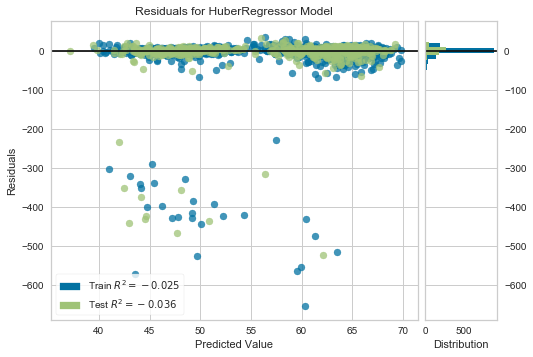

In [43]:
plot_model(tuned_model_weight)

In [44]:
save_model(tuned_model_weight, "models/model_weight")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='weight',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('dummy', Dummify(target='weight')),
                 ('fix_perfect', Remove_100(target='weight')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrou